# Belt Exam - Machine Learning - Option A - Drug Type

* James Belk
* 02/11/2023

## Project Desciption

**Task**


*   Provide a classification model to help the doctor find the best course of treatment. Labels will be 'drugQ' or 'drugZ'.




### Import Libraries

In [1]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatplotLib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Classification Metrics
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay, f1_score, accuracy_score, classification_report

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

### Functions

In [68]:
def classification_metrics(model, X_test, y_test, label='Test Data', 
                             figsize=(15,5), normalize='true',
                             cmap='Greens'): 
                             
    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_pred = model.predict(X_test)
     
   ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred, 
                normalize=normalize, cmap=cmap,              
                ax=axes[0])    
    
    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()
    

### Load Data

In [2]:
df = pd.read_csv('/content/Belt2_A_drugtype_v2_final.csv')

### Inspect the Data

In [3]:
# Display the first 5 rows
df.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


* The data has loaded correctly

In [4]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable. In this case "Drug".')

There are 296 rows, and 6 columns.
The rows represent 296 observations, and the columns represent 5 features and 1 target variable. In this case "Drug".


In [5]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    object 
 5   Drug         296 non-null    object 
dtypes: float64(1), object(5)
memory usage: 14.0+ KB


In [6]:
# Display the descriptive statistics for the numeric/object columns
display(df.describe(include='object'))
display(df.describe(include='number'))

,Gender,BP,Cholesterol,Na_to_K,Drug
count,296,221,296,296,296
unique,8,3,5,183,2
top,M,High,HIGH,12.307,drugQ
freq,149,142,156,7,148


,Age
count,237.000000
mean,47.523207
std,37.700488
min,15.000000
25%,32.000000
50%,45.000000
75%,59.000000
max,570.000000


* Data looks to be in order. However cleaning is required.

## Create a Copy of the Dataset

In [7]:
# Make a copy of the dataset for machine learning
ml_df = df.copy()

## Clean the Data

### Remove Unnecessary Columns/Rows

* No need to drop columns

In [8]:
# Display the number of duplicate rows in the dataset
print(f'There are {ml_df.duplicated().sum()} duplicate rows.')

There are 15 duplicate rows.


In [9]:
# Drop duplicate rows
ml_df = ml_df.drop_duplicates()
print(f'There are {ml_df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### Inspect Column Datatypes for Errors

In [10]:
df.dtypes

Age            float64
Gender          object
BP              object
Cholesterol     object
Na_to_K         object
Drug            object
dtype: object

* Na_to_K needs to be turned into a float64. Will take care of during processing. 

### Inspect Column Names for Errors


In [11]:
ml_df.columns

Index(['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

* No errors noted.

### Insepct Values for Errors
* Check for unusual or impossible values

In [12]:
display(ml_df.describe(include='object'))
display(ml_df.describe(include='number'))

,Gender,BP,Cholesterol,Na_to_K,Drug
count,281,206,281,281,281
unique,8,3,5,183,2
top,M,High,HIGH,12.766,drugZ
freq,140,128,145,7,147


,Age
count,227.000000
mean,47.475771
std,38.359652
min,15.000000
25%,32.000000
50%,45.000000
75%,59.000000
max,570.000000


* Checking Gender, Age, and Cholesterol

#### Age

In [13]:
ml_df['Age'].value_counts()

36.0     8
55.0     7
61.0     7
32.0     7
42.0     7
26.0     6
39.0     6
67.0     6
53.0     6
37.0     6
60.0     6
23.0     6
43.0     6
31.0     6
28.0     6
57.0     5
70.0     5
49.0     5
47.0     4
40.0     4
24.0     4
45.0     4
19.0     4
48.0     4
50.0     4
65.0     4
56.0     4
59.0     4
58.0     4
69.0     4
29.0     4
44.0     4
20.0     4
74.0     3
35.0     3
66.0     3
73.0     3
72.0     3
62.0     3
18.0     3
22.0     3
54.0     3
71.0     2
41.0     2
64.0     2
51.0     2
21.0     2
30.0     2
52.0     2
34.0     2
38.0     2
15.0     2
16.0     2
46.0     2
63.0     1
33.0     1
25.0     1
570.0    1
68.0     1
Name: Age, dtype: int64

In [14]:
ml_df.replace([570], [57], inplace = True)

In [15]:
ml_df['Age'].value_counts()

36.0    8
55.0    7
61.0    7
32.0    7
42.0    7
26.0    6
39.0    6
67.0    6
53.0    6
37.0    6
60.0    6
23.0    6
43.0    6
31.0    6
28.0    6
57.0    6
70.0    5
49.0    5
47.0    4
40.0    4
24.0    4
45.0    4
19.0    4
48.0    4
50.0    4
65.0    4
56.0    4
59.0    4
58.0    4
69.0    4
29.0    4
44.0    4
20.0    4
74.0    3
35.0    3
73.0    3
66.0    3
72.0    3
62.0    3
18.0    3
22.0    3
54.0    3
71.0    2
41.0    2
64.0    2
51.0    2
52.0    2
30.0    2
21.0    2
34.0    2
38.0    2
15.0    2
16.0    2
46.0    2
63.0    1
33.0    1
25.0    1
68.0    1
Name: Age, dtype: int64

#### Gender

In [16]:
ml_df['Gender'].value_counts()

M         140
F         131
male        4
female      2
Female      1
Male        1
femal       1
Femal       1
Name: Gender, dtype: int64

* Change [male, Male] to M and [female, Female, femal, Femal] to F.

In [17]:
ml_df.replace(['male', 'Male', 'female', 'Female', 'femal', 'Femal'], ['M', 'M', 'F', 'F', 'F', 'F'], inplace = True)

In [18]:
ml_df['Gender'].value_counts()

M    145
F    136
Name: Gender, dtype: int64

#### Cholesterol

* Change high to HIGH and [norm, NORM] to NORMAL

In [19]:
ml_df['Cholesterol'].value_counts()

HIGH      145
NORMAL    114
norm        9
high        7
NORM        6
Name: Cholesterol, dtype: int64

In [20]:
ml_df.replace(['high', 'norm', 'NORM'], ['HIGH', 'NORMAL', 'NORMAL'], inplace = True)


In [21]:
ml_df['Cholesterol'].value_counts()

HIGH      152
NORMAL    129
Name: Cholesterol, dtype: int64

### Missing Values

In [22]:
# Display the total number of missing values
print(f'There are {ml_df.isna().sum().sum()} missing values.')

There are 129 missing values.


In [23]:
# Display the count of missing values by column
print(ml_df.isna().sum())

Age            54
Gender          0
BP             75
Cholesterol     0
Na_to_K         0
Drug            0
dtype: int64


In [24]:
## Display the percentage of missing values by column
print(df.isna().sum()/len(df)*100)

Age            19.932432
Gender          0.000000
BP             25.337838
Cholesterol     0.000000
Na_to_K         0.000000
Drug            0.000000
dtype: float64


* There are missing 'Age' and 'BP'
  * We will use a SimpleImputer using a 'mode' 

## Exploratory Visuals

* Exploring the age of each individual in the study

#### Histogram

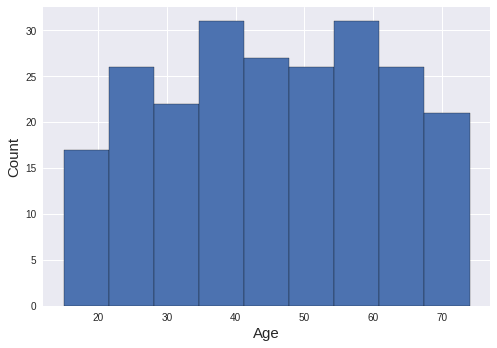

In [108]:
# Histogram
plt.style.use('seaborn')
ml_df['Age'].hist(bins='auto', edgecolor='k')
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Age', fontsize = 15);

* The histogram above shows a peak in individuals between the ages of 35-40 and 55-60 with there being more outliers in the between 15-20 and 65-70. 

* Fairly balanced spread of ages

#### Heatmap

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


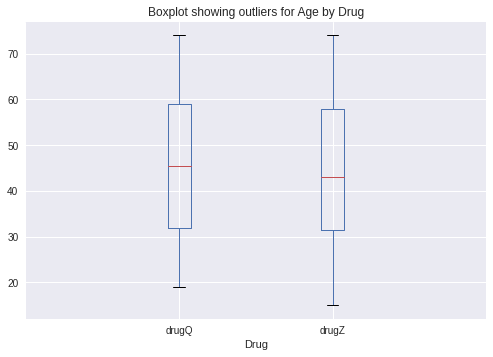

In [125]:
ml_df.boxplot(column = 'Age', by = 'Drug')

plt.title('Boxplot showing outliers for Age by Drug')
plt.suptitle('')
plt.xticks([0, 1, 2, 3], ['','drugQ', 'drugZ', '']);

* Boxplots show that there is a slight uptick in individuals who have taken the drug 'drugQ' over 'drugZ'. 
* 'DrugQ' also has less younger individuals

## Model Validation Data Split

### Check Class Balance

In [25]:
# Check how many samples of each class are present
ml_df['Drug'].value_counts(normalize=False)

drugZ    147
drugQ    134
Name: Drug, dtype: int64

In [26]:
# Check how many samples of each class are present
ml_df['Drug'].value_counts(normalize=True)

drugZ    0.523132
drugQ    0.476868
Name: Drug, dtype: float64

In [27]:
# Encode 'Drug' Column
ml_df['Drug'] = ml_df['Drug'].replace({'drugQ': 0, 'drugZ': 1})

### Split the Data

In [28]:
# Define features (X) and target (y)
target = 'Drug'
labels = ['drugQ', 'drugZ']

X = ml_df.drop(columns = [target], axis=1).copy()
y = ml_df[target].copy()

In [29]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [30]:
# Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

1    0.52381
0    0.47619
Name: Drug, dtype: float64

In [31]:
# Check how many samples of each class are present for test
y_test.value_counts(normalize=True)

1    0.521127
0    0.478873
Name: Drug, dtype: float64

## Preprocessing for Machine Learning

### ColumnSelector

In [32]:
# Instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

### Imputers

In [33]:
# Instantiate the imputer
mean_imputer= SimpleImputer(strategy='mean')
# Instantiate the transformers
scaler = StandardScaler()
# Instantiate One Hot Encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

* Chose to use mean so that the average of the missing values would help balance any outliers that might be present. 

### Pipeline

In [147]:
numeric_pipe = make_pipeline(mean_imputer, scaler)

### Tuples

In [148]:
# Create tuples
number_tuple = (numeric_pipe, num_selector)
category_tuple = (ohe, cat_selector)

### ColumnTransformer


In [149]:
# Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='drop')

## Models

### Logistic Regression Model

In [150]:
# Create an instand of the model
log_reg = LogisticRegression()
# Create a model pipeline
log_reg_pipe = make_pipeline(preprocessor, log_reg)
# Fit the model
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55bb1b66d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55bb1b6dc0>)])),
                ('logisticregression', LogisticRegression())])

In [151]:
# Save the model's predictions for the dataset
log_reg_train_preds = log_reg_pipe.predict(X_train)
# Save the model's predictions for the test dataset
log_reg_test_preds = log_reg_pipe.predict(X_test)

#### Model Evaluation

In [152]:
# print the classification report from the test data
print(classification_report(y_test, log_reg_test_preds, target_names = labels))

              precision    recall  f1-score   support

       drugQ       0.85      0.85      0.85        34
       drugZ       0.86      0.86      0.86        37

    accuracy                           0.86        71
   macro avg       0.86      0.86      0.86        71
weighted avg       0.86      0.86      0.86        71



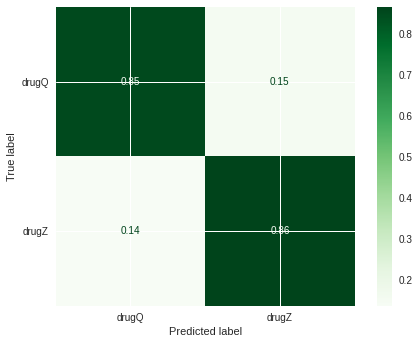

In [153]:
# create a confusion matrix with the test data
ConfusionMatrixDisplay.from_predictions(y_test, log_reg_test_preds, normalize='true', display_labels=labels, cmap='Greens');

#### Changing Decision Thresholds

In [154]:
# Get the predicted probabilities instead of predicted classes
train_probs = log_reg_pipe.predict_proba(X_train)
test_probs = log_reg_pipe.predict_proba(X_test)

In [155]:
# Display the first 5 sets of probabilities
train_probs[:5]

array([[0.81934974, 0.18065026],
       [0.85863793, 0.14136207],
       [0.84975444, 0.15024556],
       [0.16346421, 0.83653579],
       [0.35200594, 0.64799406]])

In [156]:
# Set the thresh variable value
thresh = 0.3

# use a list comprehension to apply threshold to 2nd value in each prediction
train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

print(f'Predictions with the default decision of threshold of .5')
print(log_reg_train_preds[:5], '\n')

print(f'Predictions with the default decision of threshold of {thresh}')
print(train_thresh[:5], '\n')

print('True Labels')
print(y_train[:5].values)

Predictions with the default decision of threshold of .5
[0 0 0 1 1] 

Predictions with the default decision of threshold of 0.3
[0, 0, 0, 1, 1] 

True Labels
[0 0 0 1 1]


#### Compare Confision Matrices

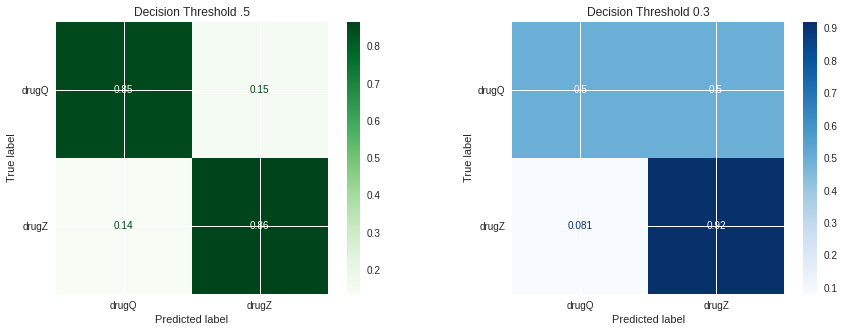

In [157]:
## Plot confusion matrices for both .5 and a 'thresh' thresholds
fig, axes = plt.subplots(1,2, figsize=(15,5))

## Confusion Matrix for default threshold value of .5
ConfusionMatrixDisplay.from_predictions(y_test, log_reg_test_preds, 
               normalize='true', display_labels=labels,  cmap='Greens',              
               ax=axes[0])
axes[0].set_title('Decision Threshold .5');

## Confusion Matrix for threshold value of thresh
ConfusionMatrixDisplay.from_predictions(y_test, test_thresh, 
               normalize='true', display_labels=labels,  cmap='Blues',
               ax=axes[1])
axes[1].set_title(f'Decision Threshold {thresh}');

#### Loop Over Decision Thresholds

In [62]:
# Create an array of 20 thresholds to use
thresholds = np.array(range(0,105,5))/100
thresholds[:5]

array([0.  , 0.05, 0.1 , 0.15, 0.2 ])

Text(0, 0.5, 'Accuracy Score')

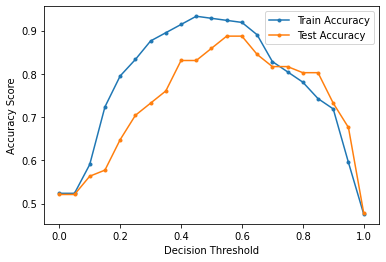

In [64]:
# Create a scores_df to store Accuracy Scores
score_df = pd.DataFrame(index=thresholds, columns=['Train Accuracy', 'Test Accuracy'])

for thresh in thresholds:
  train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
  test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

  score_df.loc[thresh, 'Train Accuracy'] = accuracy_score(train_thresh, y_train)
  score_df.loc[thresh, 'Test Accuracy'] = accuracy_score(test_thresh, y_test)

score_df.plot(marker='.')
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy Score')

In [65]:
score_df.sort_values(by='Test Accuracy', ascending=False).head()

,Train Accuracy,Test Accuracy
0.60,0.919048,0.887324
0.55,0.92381,0.887324
0.50,0.928571,0.859155
0.65,0.890476,0.84507
0.40,0.914286,0.830986


#### Roc Curve

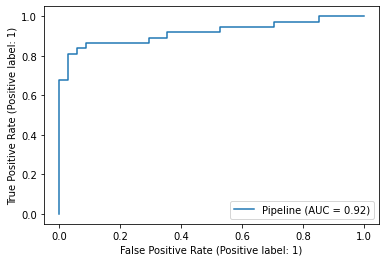

In [66]:
RocCurveDisplay.from_estimator(log_reg_pipe, X_test, y_test);

#### Precision Recall Curve

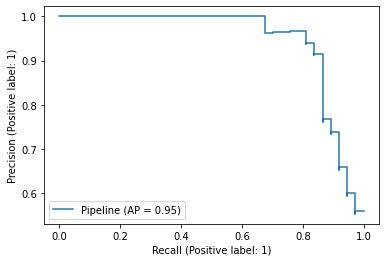

In [67]:
PrecisionRecallDisplay.from_estimator(log_reg_pipe, X_test, y_test);

#### Classification Metrics

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       100
           1       0.94      0.92      0.93       110

    accuracy                           0.93       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.93      0.93      0.93       210



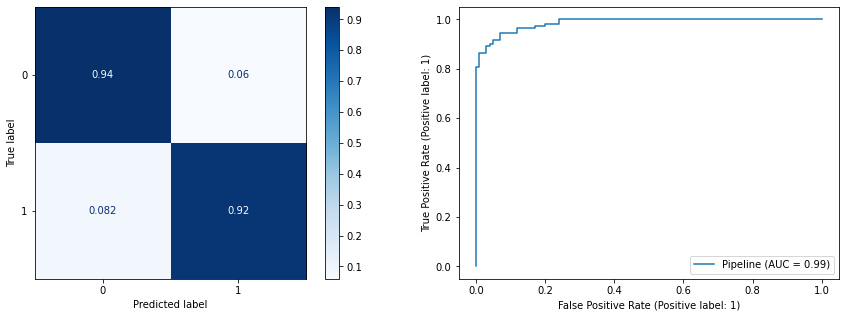

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        34
           1       0.86      0.86      0.86        37

    accuracy                           0.86        71
   macro avg       0.86      0.86      0.86        71
weighted avg       0.86      0.86      0.86        71



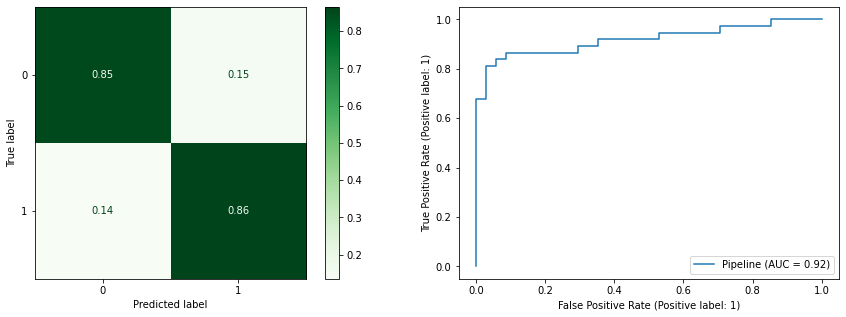

In [69]:
classification_metrics(log_reg_pipe, X_train,y_train, 
                         cmap='Blues', label='Training Data')
classification_metrics(log_reg_pipe, X_test,y_test, 
                         cmap='Greens',label='Test Data')

### KNN Model

#### Untuned KNN Model

In [72]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55bb1b66d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55bb1b6dc0>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [74]:
# Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
# Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [90]:
# Save the Classification Report
knn_train_report = classification_report(y_train, knn_train_preds,
                                         target_names=labels)
knn_test_report = classification_report(y_test, knn_test_preds,
                                         target_names=labels)
print('Classification Report for Train\n')
print(knn_train_report)

print('Classification Report for Test\n')
print(knn_test_report)

Classification Report for Train

              precision    recall  f1-score   support

       drugQ       0.73      0.88      0.80       100
       drugZ       0.87      0.70      0.77       110

    accuracy                           0.79       210
   macro avg       0.80      0.79      0.79       210
weighted avg       0.80      0.79      0.78       210

Classification Report for Test

              precision    recall  f1-score   support

       drugQ       0.71      0.71      0.71        34
       drugZ       0.73      0.73      0.73        37

    accuracy                           0.72        71
   macro avg       0.72      0.72      0.72        71
weighted avg       0.72      0.72      0.72        71



#### Tune KNN Model

In [84]:
krange = range(1, 15)
k_list = []
for k in krange:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_pipe = make_pipeline(preprocessor,knn)
  knn_pipe.fit(X_train, y_train)
  score = accuracy_score(y_test, knn_pipe.predict(X_test))
  k_list.append(score)

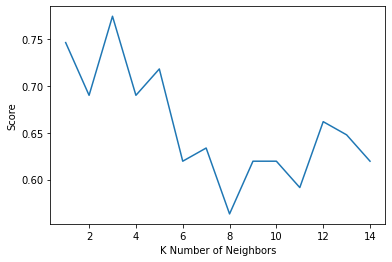

In [85]:
# Visualize Accuracy Scores
plt.plot(krange, k_list)
plt.xlabel('K Number of Neighbors')
plt.ylabel('Score');

In [88]:
# Create an instance of the best model
knn_tuned = KNeighborsClassifier(n_neighbors = 3)
# Create a model pipeline
knn_tuned_pipe = make_pipeline(preprocessor, knn_tuned)
# Fit the model
knn_tuned_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55bb1b66d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55bb1b6dc0>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [89]:
# Save the model's predictions for the train dataset
knn_train_preds_tuned = knn_tuned_pipe.predict(X_train)
# Save the model's predictions for the test dataset
knn_test_preds_tuned = knn_tuned_pipe.predict(X_test)

#### Classification Metrics

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       100
           1       0.93      0.83      0.87       110

    accuracy                           0.88       210
   macro avg       0.88      0.88      0.88       210
weighted avg       0.88      0.88      0.88       210



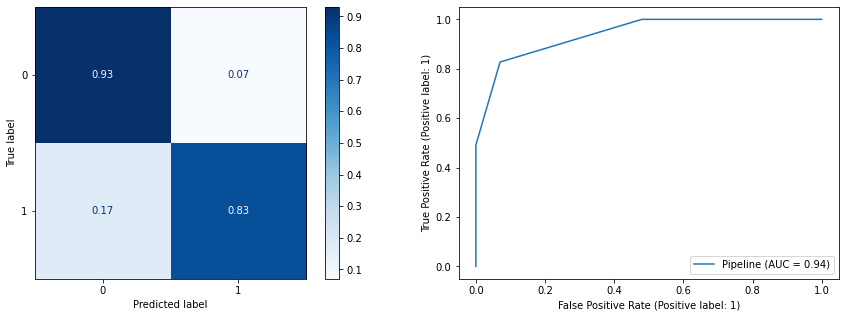

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        34
           1       0.78      0.78      0.78        37

    accuracy                           0.77        71
   macro avg       0.77      0.77      0.77        71
weighted avg       0.77      0.77      0.77        71



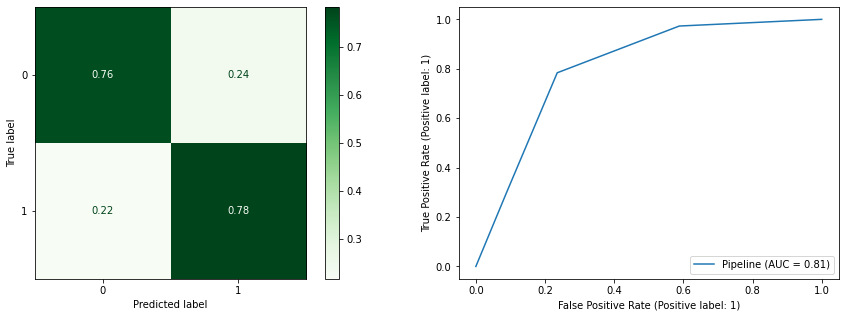

In [93]:
# Save the Classification Report
classification_metrics(knn_tuned_pipe, X_train,y_train, 
                         cmap='Blues', label='Training Data')
classification_metrics(knn_tuned_pipe, X_test,y_test, 
                         cmap='Greens',label='Test Data')

## Final Model Recommendation

* The Logistic Regression Model would be the best model to use for predicting the doctors' future treatment choices. 

* Comparing the KNN and Logistic Regression models you can see the clear advantage in the False Positive and False Negatives but I am more concerned with the False Negatives. The .14% chance compared to the .22% chance is a larger chance for future patients to go untreated which could lead to death. The lower False Positives is also a benefit but at least they would have treatments and other tests.

